# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# Print Data Retrieval 
print("Beginning Data Retrieval")
print("------------------------")
print("-------------------")
print("--------------")
print("---------")
print("")
print("")

# Build URL

url = "http://api.openweathermap.org/data/2.5/weather?"

units = "Imperial"

q_url = f"{url}appid={weather_api_key}&units={units}&q="


# Pull Weather Data w/ JSON

weather_dmps = requests.get(q_url + city)
weather_dmps_json = weather_dmps.json()

# Create Lists to Hold Variables

city_names = []
latitudes = []
longitudes = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country_code = []
date = []

# Set Counters

record_count = 1 
set_count = 1

# Start Loop 

for city in cities:
         
    try:
        response = requests.get(q_url + city).json()
        city_names.append(response["name"])
        latitudes.append(response["coord"]["lat"])
        longitudes.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country_code.append(response["sys"]["country"])
        date.append(response["dt"])
        print("Processing Record %s of Set %s -- %s" % (record_count,set_count,city))
   
                            
    # Add the rest of the records
        record_count += 1
        set_count += 1
    
    except (KeyError, IndexError):
        print(f'No City Found -- Moving Along!')
    

# Print Ending
print("")
print("-----")
print("-------------")
print("------------------------")
print("-----------------------------")
print("-------------------------")
print("-------------")
print("-----")
print("")
print("-------------------")

print("All Records Printed")
print("")
print("-------------------")

    
        

Processing Record 199 of Set 199 -- spearfish
Processing Record 200 of Set 200 -- livny
Processing Record 201 of Set 201 -- mahebourg
Processing Record 202 of Set 202 -- kuito
Processing Record 203 of Set 203 -- dikson
Processing Record 204 of Set 204 -- flinders
Processing Record 205 of Set 205 -- san quintin
Processing Record 206 of Set 206 -- chichimila
Processing Record 207 of Set 207 -- keti bandar
Processing Record 208 of Set 208 -- kodiak
Processing Record 209 of Set 209 -- ketchikan
Processing Record 210 of Set 210 -- chifeng
Processing Record 211 of Set 211 -- buala
Processing Record 212 of Set 212 -- ancud
Processing Record 213 of Set 213 -- puqi
Processing Record 214 of Set 214 -- tiznit
Processing Record 215 of Set 215 -- guerrero negro
Processing Record 216 of Set 216 -- kaseda
Processing Record 217 of Set 217 -- sorong
Processing Record 218 of Set 218 -- lazaro cardenas
Processing Record 219 of Set 219 -- buraydah
Processing Record 220 of Set 220 -- lisakovsk
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Create Dictionary 

list = {"City": city_names,
    "Latitude": latitudes,
    "Longitude": longitudes,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country_code,
    "Date": date}

df = pd.DataFrame.from_dict(list,orient='index')
    
df.transpose()


,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aklavik,68.2191,-135.011,-25.6,75,0,4.61,CA,1613014867
1,Albany,42.6001,-73.9662,23,48,100,1.99,US,1613014643
2,Bethel,41.3712,-73.414,25,68,90,3.44,US,1613014914
3,Quelimane,-17.8786,36.8883,77,78,75,4.61,MZ,1613014914
4,Kieta,-6.2167,155.633,81.64,79,95,6.62,PG,1613014914
...,...,...,...,...,...,...,...,...,...
577,Oga,46.4631,10.347,33.01,68,75,10.36,IT,1613015002
578,Pinhão,-25.6956,-51.6597,57.42,96,100,5.59,BR,1613015002
579,Quincy,42.2529,-71.0023,24.01,68,94,8.05,US,1613015002
580,Bonthe,7.5264,-12.505,76.66,91,4,3.87,SL,1613015003


In [14]:
# Find Count, Mean, St. Dev, Minimum, 25% Percentile, 50% Percentile, 75% Percentile, 100% Percentile

# Count

count_lat = df.loc["Latitude"].count()

count_lon = df.loc["Longitude"].count()

count_mt = df.loc["Max Temperature"].count()

count_hum = df.loc["Humidity"].count()

count_cl = df.loc["Cloudiness"].count()

count_ws = df.loc["Wind Speed"].count()

count_date = df.loc["Date"].count()

# Average

mean_lat = df.loc["Latitude"].mean()

mean_lon = df.loc["Longitude"].mean()

mean_mt = df.loc["Max Temperature"].mean()

mean_hum = df.loc["Humidity"].mean()

mean_cl = df.loc["Cloudiness"].mean()

mean_ws = df.loc["Wind Speed"].mean()

mean_date = df.loc["Date"].mean()


# Standard Dev.


std_lat = df.loc["Latitude"].std()

std_lon = df.loc["Longitude"].std()

std_mt = df.loc["Max Temperature"].std()

std_hum = df.loc["Humidity"].std()

std_cl = df.loc["Cloudiness"].std()

std_ws = df.loc["Wind Speed"].std()

std_date = df.loc["Date"].std()

# Min

min_lat = df.loc["Latitude"].min()

min_lon = df.loc["Longitude"].min()

min_mt = df.loc["Max Temperature"].min()

min_hum = df.loc["Humidity"].min()

min_cl = df.loc["Cloudiness"].min()

min_ws = df.loc["Wind Speed"].min()

min_date = df.loc["Date"].min()

# Max 

max_lat = df.loc["Latitude"].max()

max_lon = df.loc["Longitude"].max()

max_mt = df.loc["Max Temperature"].max()

max_hum = df.loc["Humidity"].max()

max_cl = df.loc["Cloudiness"].max()

max_ws = df.loc["Wind Speed"].max()

max_date = df.loc["Date"].max()

# Set Quartiles

lat_col = df.loc["Latitude"]

lat_qs = lat_col.quantile([.25,.5,.75])

lon_col = df.loc["Latitude"]

lon_qs = lon_col.quantile([.25,.5,.75])

mt_col = df.loc["Max Temperature"]

mt_qs = mt_col.quantile([.25,.5,.75])

hum_col = df.loc["Humidity"]

hum_qs = hum_col.quantile([.25,.5,.75])

cl_col = df.loc["Cloudiness"]

cl_qs = cl_col.quantile([.25,.5,.75])

ws_col = df.loc["Wind Speed"]

ws_qs = ws_col.quantile([.25,.5,.75])

date_col = df.loc["Date"]

date_qs = date_col.quantile([.25,.5,.75])

# Pull Numbers

# Latitude

lat_high = lat_qs[.75]

lat_mid = lat_qs[.5]

lat_low = lat_qs[.25]

# -------

# Longitude

lon_high = lon_qs[.75]

lon_mid = lon_qs[.5]

lon_low = lon_qs[.25]

# --------

# Max Temp

mt_high = mt_qs[.75]

mt_mid = mt_qs[.5]

mt_low = mt_qs[.25]

# ---------

# Humidity


hum_high = hum_qs[.75]

hum_mid = hum_qs[.5]

hum_low = hum_qs[.25]

# ----------

# Cloudiness 

cl_high = cl_qs[.75]

cl_mid = cl_qs[.5]

cl_low = cl_qs[.25]

# ----------

# Wind Speed

ws_high = ws_qs[.75]

ws_mid = ws_qs[.5]

ws_low = ws_qs[.25]

# ----------

# Date 

date_high = date_qs[.75]

date_mid = date_qs[.5]

date_low = date_qs[.25]


In [15]:
# build dataframe with summary statistics

df_new = pd.DataFrame({
    
    "Latitude": [count_lat, mean_lat, std_lat, min_lat, lat_low, lat_mid, lat_high, max_lat],
    "Longitude": [count_lon, mean_lon, std_lon, min_lon, lon_low, lon_mid, lon_high, max_lon],
    "Max Temperature":[count_mt, mean_mt, std_mt, min_mt, mt_low, mt_mid, mt_high, max_mt],
    "Humidity":[count_hum, mean_hum, std_hum, min_hum, hum_low, hum_mid, hum_high, max_hum],
    "Cloudiness":[count_cl, mean_cl, std_cl, min_cl, cl_low, cl_mid, cl_high, max_cl],
    "Wind Speed":[count_ws, mean_ws, std_ws, min_ws, ws_low, ws_mid, ws_high, max_ws],
    "Date":[count_date, mean_date, std_date, min_date, date_low, date_mid, date_high, max_date]})

    
index = ['Count','Mean', 'Standard Dev.', 'Min', '25%','50%','75%','100%']

df_new.index = index

df_new


,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
Count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,5.820000e+02
Mean,18.744658,23.352862,50.402457,73.398625,51.567010,7.732457,1.613015e+09
Standard Dev.,32.681850,88.672197,32.767627,20.359992,39.736154,5.793966,7.626403e+01
Min,-54.800000,-175.200000,-40.000000,13.000000,0.000000,0.180000,1.613015e+09
25%,-8.134500,-8.134500,25.600000,62.000000,6.000000,3.760000,1.613015e+09
50%,20.880700,20.880700,62.600000,78.000000,51.000000,6.465000,1.613015e+09
75%,46.427050,46.427050,76.322500,88.000000,91.000000,10.347500,1.613015e+09
100%,78.218600,179.316700,104.000000,100.000000,100.000000,42.570000,1.613015e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

# Our Max Value was 100 for Humidity - so we do not have any cities with over 100% humidity.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

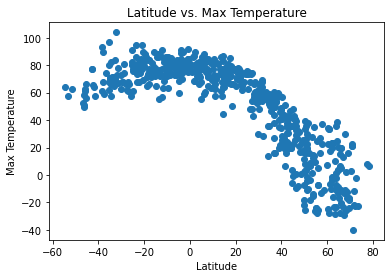

In [16]:
# Temp vs. Lat

temp_vs_lat = plt.scatter(df.loc["Latitude"], df.loc["Max Temperature"])


plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

plt.savefig("./WeatherPy")

plt.show()





In [ ]:
# As the latitude approaches 0, the temperatures get higher. This makes sense, as we know most of the warmest countries are near the equator.

## Latitude vs. Humidity Plot

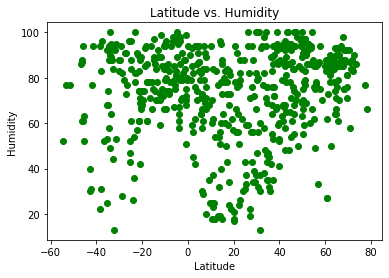

In [17]:
lat_vs_hum = plt.scatter(df.loc["Latitude"], df.loc["Humidity"], facecolors = "green")


plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("./WeatherPy")

plt.show()


In [ ]:
# There doesn't appear to be any sort of relationship between latitude and humidity. There doesn't appear to be a linear, nor parabolic relationship, which makes sense. 

## Latitude vs. Cloudiness Plot

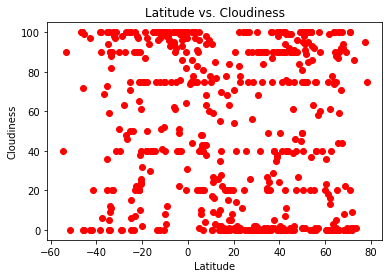

In [18]:
lat_vs_cloud = plt.scatter(df.loc["Latitude"], df.loc["Cloudiness"], facecolors = "red")

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("./WeatherPy")

plt.show()

In [ ]:
# This dataset is defined by its extremes - Generally speaking, it appears most cities are either really cloudy or not at all, regardless of latitude. 

## Latitude vs. Wind Speed Plot

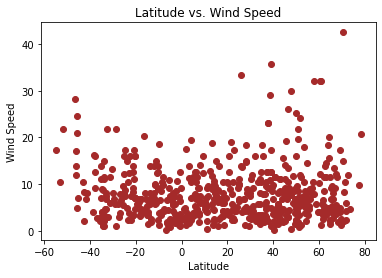

In [19]:
lat_vs_wind = plt.scatter(df.loc["Latitude"], df.loc["Wind Speed"], facecolors = "brown")

plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.savefig("./WeatherPy")

plt.show()

In [ ]:
# There doesn't appear to be much of a relationship in this data. If anything, it demonstrates that most cities aren't that windy.

## Linear Regression

In [20]:
# Sort DataFrame by Hemisphere

#Clean DF
clean_df = df.transpose()

# Sort & Create New DFs

north_hemi = clean_df.loc[clean_df["Latitude"]>=0]
south_hemi = clean_df.loc[clean_df["Latitude"]<0]

clean_df


In [ ]:
clean_df.to_csv("VacationPy", index=False)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-Squared = 0.7712006999031765


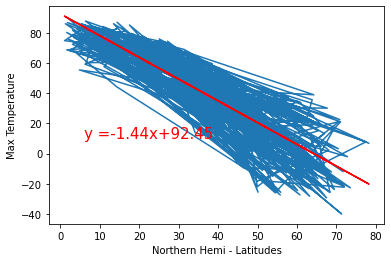

This indicates a strong inverse correlation between max temperature and latitude


In [59]:
# North Hemi - Max Temp vs. Latitude

x_values = north_hemi["Latitude"].astype(float)
y_values = north_hemi["Max Temperature"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values* slope + intercept
line_eq = "y =" + str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15, color="red")
plt.xlabel("Northern Hemi - Latitudes")
plt.ylabel("Max Temperature")
print(f"R-Squared = {rvalue**2}")
plt.show()

print("This indicates a strong inverse correlation between max temperature and latitude")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-Squared = 0.2109037461524001
This correlation indicates a weak relationship between the highest temperatures and latitudes in the Southern Hemisphere.


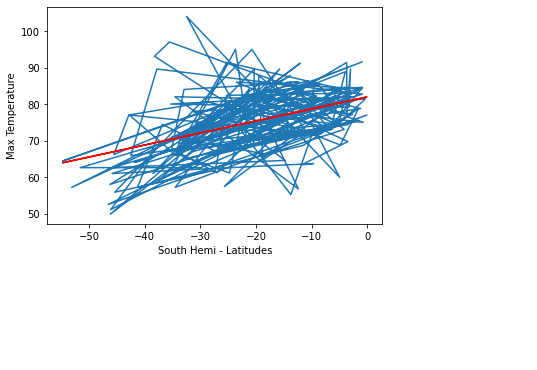

In [40]:
# South Hemi - Max Temp vs. Latitude

x_values = south_hemi["Latitude"].astype(float)
y_values = south_hemi["Max Temperature"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values* slope + intercept
line_eq1 = "y =" + str(round(slope,2))+"x+"+str(round(intercept,2))
#plt.scatter(south_hemi["Latitude"],south_hemi["Max Temperature"])
plt.plot(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15, color="red")
plt.xlabel("South Hemi - Latitudes")
plt.ylabel("Max Temperature")
print(f"R-Squared = {rvalue**2}")
print("This correlation indicates a weak relationship between the highest temperatures and latitudes in the Southern Hemisphere.")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-Squared = 0.11128070641798946


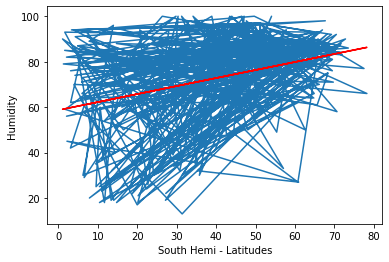

An R-Squared of 0.11128070641798946 reflects weak correlation.


In [45]:
# North Hemi - Humidity vs. Latitude

x_values = north_hemi["Latitude"].astype(float)
y_values = north_hemi["Humidity"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values* slope + intercept
line_eq = "y =" + str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(4,8),fontsize=15, color="red")
plt.xlabel("South Hemi - Latitudes")
plt.ylabel("Humidity")
print(f"R-Squared = {rvalue**2}")
plt.show()

plt.scatter=(x_values, y_values)

print(f"An R-Squared of {rvalue**2} reflects weak correlation.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-Squared = 0.062291246728014234


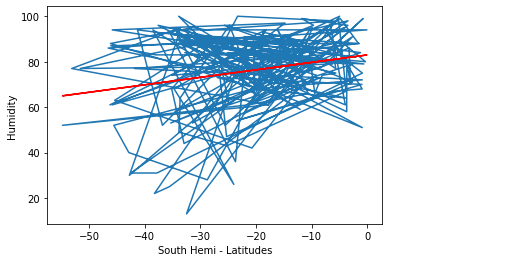

There is extremely weak correlation.


In [62]:
# South Hemi - Humiidity vs. Latitude

x_values = south_hemi["Latitude"].astype(float)
y_values = south_hemi["Humidity"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values* slope + intercept
line_eq = "y =" + str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(4,8),fontsize=15, color="red")
plt.xlabel("South Hemi - Latitudes")
plt.ylabel("Humidity")
print(f"R-Squared = {rvalue**2}")
plt.show()

print("There is extremely weak correlation.")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Squared = 0.0030317518863093866


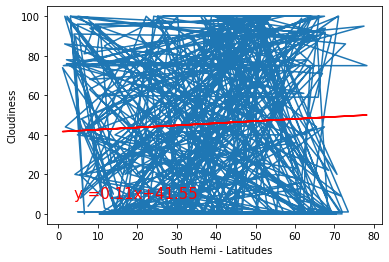

This dataset is completely uncorrelated.


In [55]:
# North Hemi - Max Temp vs. Latitude

x_values = north_hemi["Latitude"].astype(float)
y_values = north_hemi["Cloudiness"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values* slope + intercept
line_eq = "y =" + str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(4,8),fontsize=15, color="red")
plt.xlabel("South Hemi - Latitudes")
plt.ylabel("Cloudiness")
print(f"R-Squared = {rvalue**2}")
plt.show()
print(f"This dataset is completely uncorrelated.")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Squared = 0.06920002149153322


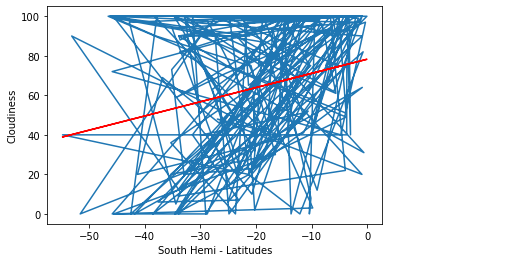

There is no correlation here either.


In [56]:
# North Hemi - Max Temp vs. Latitude

x_values = south_hemi["Latitude"].astype(float)
y_values = south_hemi["Cloudiness"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values* slope + intercept
line_eq = "y =" + str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(4,8),fontsize=15, color="red")
plt.xlabel("South Hemi - Latitudes")
plt.ylabel("Cloudiness")
print(f"R-Squared = {rvalue**2}")
plt.show()

print("There is no correlation here either.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Squared = 0.1259121900508063


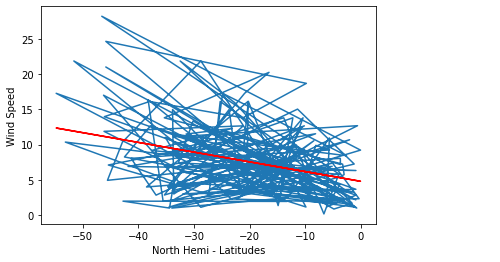

In [53]:
# North Hemi - Wind Speed vs. Latitude

x_values = south_hemi["Latitude"].astype(float)
y_values = south_hemi["Wind Speed"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values* slope + intercept
line_eq = "y =" + str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(4,8),fontsize=15, color="red")
plt.xlabel("North Hemi - Latitudes")
plt.ylabel("Wind Speed")
print(f"R-Squared = {rvalue**2}")
plt.show()

print("There is no correlation pattern.")



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Squared = 0.1259121900508063


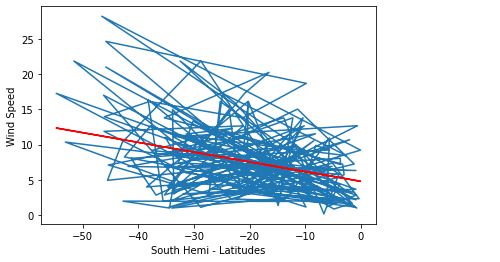

In [63]:
# North Hemi - Max Temp vs. Latitude

x_values = south_hemi["Latitude"].astype(float)
y_values = south_hemi["Wind Speed"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values* slope + intercept
line_eq = "y =" + str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(4,8),fontsize=15, color="red")
plt.xlabel("South Hemi - Latitudes")
plt.ylabel("Wind Speed")
print(f"R-Squared = {rvalue**2}")
plt.show()

